# Set the NOMAD Upload id
- Use the doi to find the nomad dataset
- go to the entry page
- copy the Uplaod id and paste it here

In [1]:
upload_id = 'Uu6vvCF9QoOG1NMUWNzPhw'

# EBSD example dataset
## Introduction
EBSD measurements of an as-transformed $\tau-(\mathrm{Mn}_{53}\mathrm{Al}_{45}\mathrm{C}_2)_{99.4}\mathrm{Ni}_{0.6}$-sample. The sample homogenization at 1100°C for 120 min, then cooled in air inside the quartz-glass ampule, in order to obtain the $\tau-$phase.

The measurement was saved in an H5OINA-file and already analyzed in an MTEX matlab script (see). From there an inverse pole figure map (IPF-map) and a CSV-like TXT-file with several grain characteristics were exported. Let's take a look at the IPF-map. First, we need to import some libraries to handle and plot the data.
## Data preview
### EBSD map

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import BytesIO

##### load files

In [3]:
url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_EBSD_RawData/data/IPF-map_with_GB.png'
response = requests.get(url)

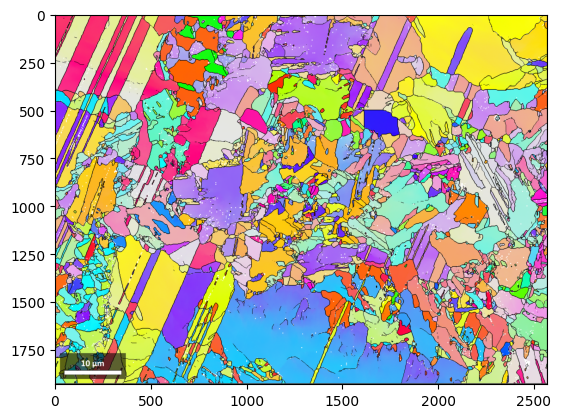

In [5]:
# Loading and plotting png file with the map extracted from MTEX
ipfmap = plt.imread(BytesIO(response.content), format='png')
plt.imshow(ipfmap)

### Grains characteristics
#### Characteristics table preview

In [6]:
# Loading and previewing the grain characteristics data
# url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_EBSD_RawData/data/grain_characteristics.txt'
url = 'https://keeper.mpdl.mpg.de/f/8848abceb284403bb65a/?dl=1'
grains = pd.read_csv(url)
grains
# TODO: Explain headers?

,id,numpix,eqdiam,area,perimeter,longAxis,shortAxis,sphericity,czang
0,1,3,0.300130,0.070747,1.215810,0.250621,0.089855,0.387760,59.117840
1,2,2,0.328421,0.084713,1.155426,0.195311,0.138062,0.446487,58.630018
2,3,2,0.258415,0.052448,1.002808,0.177363,0.094127,0.404781,29.225200
3,4,2,0.195458,0.030005,0.745246,0.139761,0.068337,0.411977,29.673723
4,5,3,0.294123,0.067944,1.160138,0.223667,0.096694,0.398235,85.285286
...,...,...,...,...,...,...,...,...,...
2154,2155,1015,5.538021,24.087907,26.138593,3.678924,2.084147,0.332807,76.502694
2155,2156,5,0.392334,0.120893,1.549904,0.280346,0.137264,0.397623,75.937427
2156,2157,46,1.190693,1.113498,4.662315,0.786732,0.450518,0.401160,70.706163
2157,2158,3,0.370537,0.107833,1.662766,0.343964,0.099791,0.350042,76.228946


#### Average diameter

In [7]:
awm_diam = np.average(grains['eqdiam'],  weights=grains['area'])
std_diam = np.std(grains['eqdiam'])

print(f'The area weighted mean circle equivalent diameter is {awm_diam:.2f} ± {std_diam:.2f} µm')

The area weighted mean circle equivalent diameter is 6.40 ± 1.43 µm


### Plots
#### Area weighted density
For EBSD-data it's always important to keep everything area-weighted to prevent an overrepresentation of small grains. Working with areay weighted values more accurately describes, which fraction of the material exhibits certain characteristics.

[]

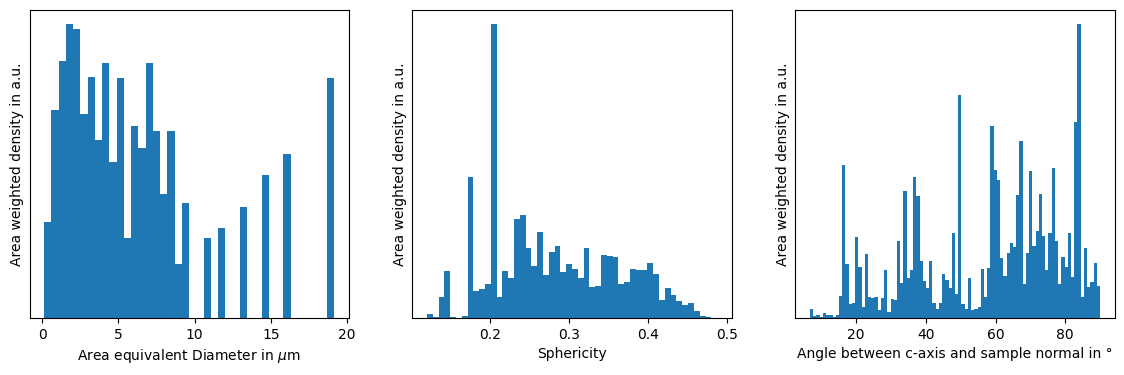

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

ax1.hist(grains['eqdiam'], bins=40,
                    weights=grains['area'], density=True,
                    histtype='barstacked')
ax1.set_xlabel('Area equivalent Diameter in $\\mu$m')
ax1.set_ylabel('Area weighted density in a.u.')
ax1.set_yticks([])
ax2.hist(grains['sphericity'], bins=50,
                    weights=grains['area'], density=True,
                    histtype='barstacked')
ax2.set_xlabel('Sphericity')
ax2.set_ylabel('Area weighted density in a.u.')
ax2.set_yticks([])
ax3.hist(grains['czang'], bins=90,
                    weights=grains['area'], density=True,
                    histtype='barstacked')
ax3.set_xlabel('Angle between c-axis and sample normal in °')
ax3.set_ylabel('Area weighted density in a.u.')
ax3.set_yticks([])

#### Long vs short axis of fitted ellipse 

Text(0, 0.5, 'Short axis of fitted ellipse in µm')

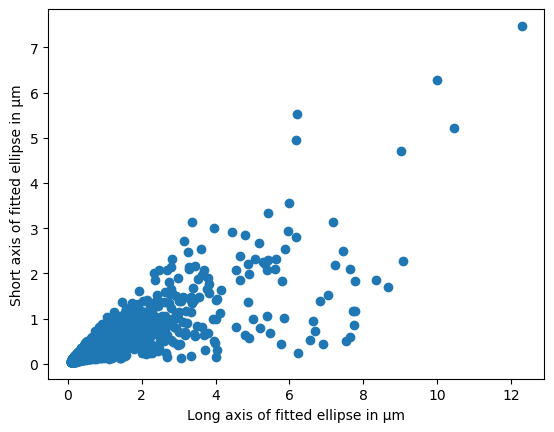

In [19]:
fig, ax = plt.subplots()

ax.scatter(grains['longAxis'], grains['shortAxis'])
ax.set_xlabel('Long axis of fitted ellipse in µm')
ax.set_ylabel('Short axis of fitted ellipse in µm')